### Context  
_____________________________  

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage.

### Objective  
_______________________________  
Here, we are analyzing different aspects of Diabetes in the Pima Indians tribe by doing Exploratory Data Analysis.

### Data Dictionary  
____________________________________  

The dataset has the following information:

1) Pregnancies: Number of times pregnant  
2) Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test  
3) BloodPressure: Diastolic blood pressure (mm Hg)  
4) SkinThickness: Triceps skin fold thickness (mm)  
5) Insulin: 2-Hour serum insulin (mu U/ml)  
6) BMI: Body mass index (weight in kg/(height in m)^2)  
7) DiabetesPedigreeFunction: A function which scores likelihood of diabetes based on family history.  
8) Age: Age in years  
9) Outcome : Class variable (0: person is not diabetic or 1: person is diabetic)

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# here pd.read_csv will read the CSV file and will create a datafram.  .head() will return top 5 records.

dataset = pd.read_csv("diabetes.csv")

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print('The shape of the dataset is: ',dataset.shape)

The shape of the dataset is:  (768, 9)


In [5]:
# Use info() function to get all the information about the dataset.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Are there any missing values in the dataframe?

In [6]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(dataset)


,Total,Percent
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


- We may come across datasets with incomplete data, this means that there may be some values missing from the dataset. If we were to use datasets with incomplete data, our results may be skewed or completely wrong. That is why we **always** have to check for missing data and handle it according to the questions we are trying to answer. We may be able to do our calculations without the missing data, or **we may have to filter out the incomplete rows or columns depending on the situation.**  

- As we can see in the table above, there are no strictly missing values in this dataframe. However, **there is a lot of 0 values in features where it does not make sense to have 0 values, this may indicate that there were missing valus which were replaced with 0. Because of this, we will filter out the 0 values in the Glucose, BloodPressure, SkinThickness and BMI variables, since these are the only variables we can be absolutely certain that the value can not be 0.**

In [7]:
# replacing 0 with nan values 

dataset['Glucose'].replace(0, np.nan, inplace=True)
dataset['BloodPressure'].replace(0, np.nan, inplace=True)
dataset['SkinThickness'].replace(0, np.nan, inplace=True)
dataset['BMI'].replace(0, np.nan, inplace=True)

In [8]:
# now let's check how many null values are there

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(dataset)

,Total,Percent
SkinThickness,227,0.295573
BloodPressure,35,0.045573
BMI,11,0.014323
Glucose,5,0.006510
Pregnancies,0,0.000000
Insulin,0,0.000000
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


- With the new considerations, we can observe that we have filtered out ~30% of our data. This will reduce the sample size, but will increase the accuracy of our conclusiions.  

- Skin Thickness has 227, BP has 35, BMI has 11, GLucose has 5 missing values  

here we can see that percentage of missing values is very very less compare to whole dataset, it's not even 1% so we can simply drop the missing data

In [10]:
dataset = dataset.dropna()

### What does summary statistics of data represents?

In [11]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,3.516917,121.030075,71.505639,29.182331,114.988722,32.890226,0.502966,31.614662,0.332707
std,3.312036,30.999226,12.310253,10.523878,123.007555,6.881109,0.344546,10.761584,0.471626
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.750000,64.000000,22.000000,0.000000,27.875000,0.258750,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,91.500000,32.800000,0.416000,28.000000,0.000000
75%,5.000000,141.250000,80.000000,36.000000,165.250000,36.900000,0.658500,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Summary statistics sumarize and provide information about our sample data, they help us measure the location of our data, trends in our data, spread, skewness, etc. THey help us paint an initial picture of our data so we can decide how to analyze it moving forward.
- For example, if we look at the 'Pregnancies' column in the table above we can learn a couple of things:
    - Count:
        - We are analyzing the data of 532 individuals, since the count returns the amount of cells in the pregnancy column,regardless of their value.
    - Mean:
        - The average number of pregnancies in our sample is ~3.5 (we can round up to 4)
    - STD(standard deviation):
        - The STD in our dataset is ~3.31, which means that 68% (roughly two thirds) of the individuals in our dataset had between 0 and 7 pregnancies.
    - Min:
        - The lowest amount of pregnancies for a given individual in our dataset is 0(no pregnancies). Note that this value can be an outlier and it is not representative of the whole dataset.
    - 25%:
        - 75% of the individuals in our dataset had at least 1 pregnancy
    - 50%:
        - 50% of the individuals in our dataset had at least 2 pregnancies
    - 75%:
        - Only 25% of the individuals in our dataset had more than 5 pregnancies
    - Max:
        - The individual with the highest amount of pregnancies in our sample had 17 pregnancies. Note that this value can be an outlier and it is not representative of the whole dataset.

### distribution plot for the variable 'BloodPressure

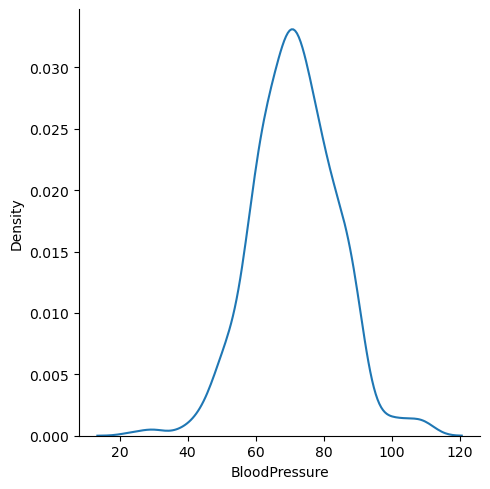

In [12]:
sns.displot(dataset['BloodPressure'], kind='kde')
plt.show()

- The distribution plot above, tells us that most of the individuals in our dataset have a bloodpressure of ~70. We can also observe taht our data folllows a nearly normal distribution with a slight left skew.

### What is the 'BMI' for the person having the highest 'Glucose'?

In [22]:
dataset[dataset['Glucose']==dataset['Glucose'].max()]['BMI']


661    42.9
Name: BMI, dtype: float64

- he BMI for the person with the highest Glucose (661) is ***42.9***

### What is the mean of the variable 'BMI'?
### What is the median of the variable 'BMI'?
### What is the mode of the variable 'BMI'?
### Are the three measures of central tendency equal?

In [23]:
m1 = dataset['BMI'].mean()  #Mean
print('The Mean for the BMI is:', m1)
m2 = dataset['BMI'].median()  #Median
print('The Median for the BMI is:', m2)
m3 = dataset['BMI'].mode()[0]  #Mode
print('The Mode for the BMI is:', m3)

The Mean for the BMI is: 32.89022556390977
The Median for the BMI is: 32.8
The Mode for the BMI is: 32.0


### How many women's 'Glucose' level is above the mean level of 'Glucose'?

In [24]:
print('There are',dataset[dataset['Glucose']>dataset['Glucose'].mean()].shape[0], 'individuals in this dataset with a Glucose level above the Mean glucose level of', dataset['Glucose'].mean())


There are 230 individuals in this dataset with a Glucose level above the Mean glucose level of 121.03007518796993


### Plot the scatterplot between 'Glucose' and 'Insulin'. Write your observations from the plot

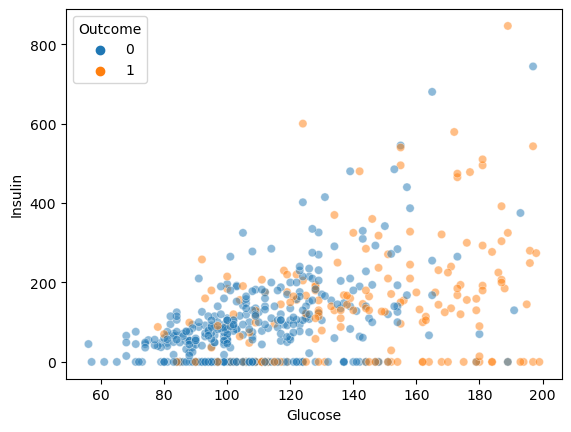

In [26]:
sns.scatterplot(x='Glucose',y='Insulin',data=dataset[dataset['Glucose']!=0], hue='Outcome', alpha=0.5)
plt.show()

- We can not draw meaningful information from the plot above with the current variables.
- If we also took into account a ***Time with Diabetes*** variable and the ***Age*** variable we would be able to reduce the dispersion of the data and draw much more meaningful information, since those two (variables) are also factors in the 'Insulin to Glucose ratio'.

### Plot the boxplot for the 'Age' variable. Are there outliers?

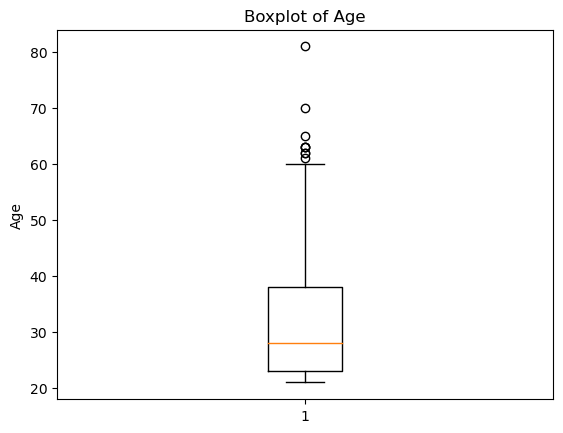

There are 9 'Age' outliers in the dataset.


In [27]:
plt.boxplot(dataset['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)
IQR = Q3 - Q1
ageOutliers=((dataset['Age'] < (Q1 - 1.5 * IQR)) | (dataset['Age'] > (Q3 + 1.5 * IQR))).sum()

print('There are',ageOutliers,'\'Age\' outliers in the dataset.')

### Plot histograms for variable Age to understand the number of women in different Age groups given that they have diabetes or not.

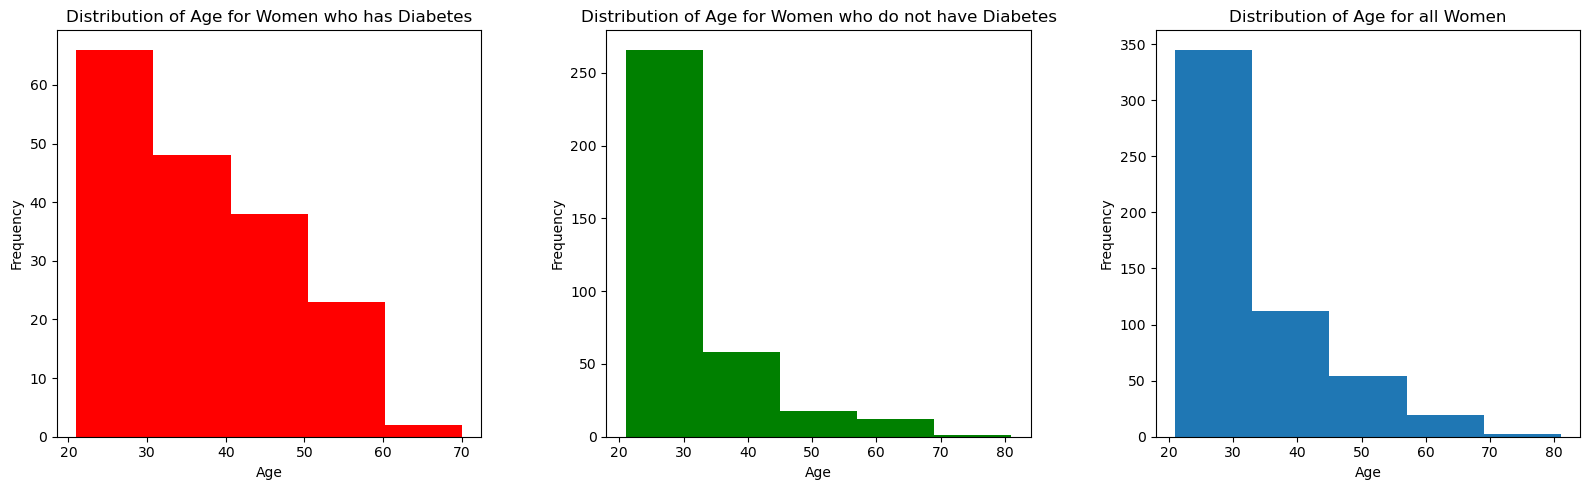

In [28]:
plt.figure(figsize=(16, 5))

plt.subplot(131)

plt.hist(dataset[dataset['Outcome']==1]['Age'], bins = 5, color='r')
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(132)

plt.hist(dataset[dataset['Outcome']==0]['Age'], bins = 5, color='g')
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(133)

plt.hist(dataset['Age'], bins = 5)
plt.title('Distribution of Age for all Women')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout(w_pad=5)

- Distribution of Age for **Women who has Diabetes**
    - We can observe that Diabetes is present in every age group in our sample except for the 70-80 group which has 0 cases of Diabetes in our sample. We can infere that this is because individuals with diabetes in our population do not reach this age.
- Distribution of Age for **Women who do not have Diabetes**
    - We can see that there is a sharp drop in frequency from the 20-30 group to the rest of the Age groups, this may suggest that individuals in our population develop Diabetes in their 20s.
- Distribution of Age for **all Women**
    - This last histogram shows that the frequency of age has a sharp decline from the 20-30 Age group onwards, since the green histogram shows a similar distribution we can speculate that there is a correlation between Diabetes and Mortality in our population, but we need more data to prove this.

### Find and visualize the the correlation matrix. 

In [30]:
corr_matrix = dataset.corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.125330,0.204663,0.095085,-0.006568,0.008576,0.007435,0.640747,0.252586
Glucose,0.125330,1.000000,0.219178,0.226590,0.459905,0.247079,0.165817,0.278907,0.503614
BloodPressure,0.204663,0.219178,1.000000,0.226072,0.007052,0.307357,0.008047,0.346939,0.183432
SkinThickness,0.095085,0.226590,0.226072,1.000000,0.126240,0.647422,0.118636,0.161336,0.254874
Insulin,-0.006568,0.459905,0.007052,0.126240,1.000000,0.191168,0.151531,0.081126,0.212204
BMI,0.008576,0.247079,0.307357,0.647422,0.191168,1.000000,0.151107,0.073438,0.300901
DiabetesPedigreeFunction,0.007435,0.165817,0.008047,0.118636,0.151531,0.151107,1.000000,0.071654,0.233074
Age,0.640747,0.278907,0.346939,0.161336,0.081126,0.073438,0.071654,1.000000,0.315097
Outcome,0.252586,0.503614,0.183432,0.254874,0.212204,0.300901,0.233074,0.315097,1.000000


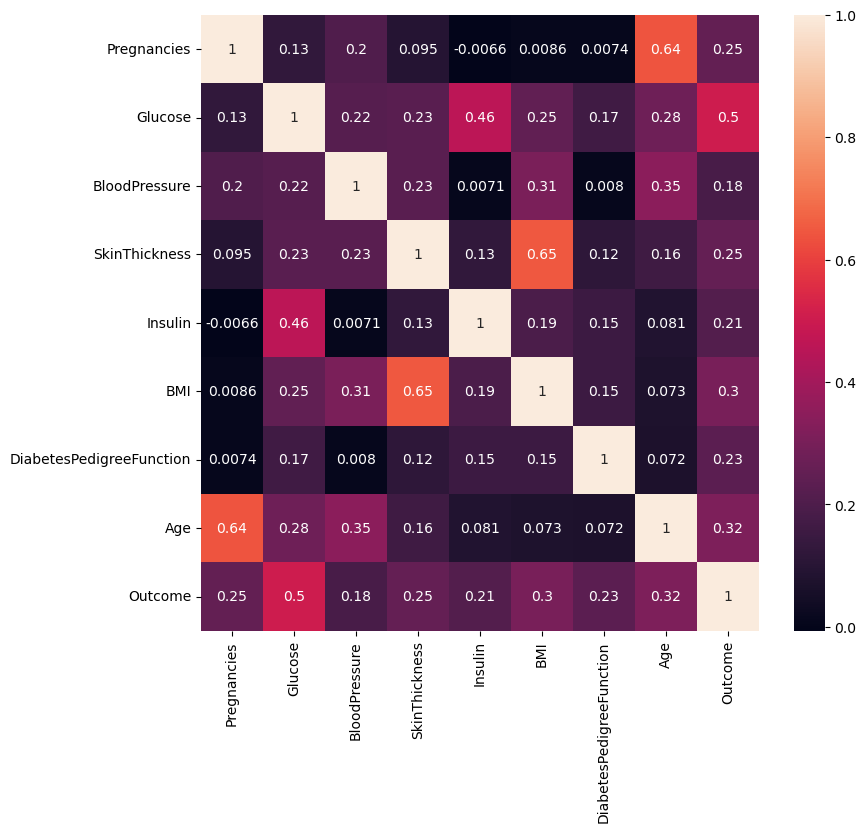

In [31]:
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

- We observe a **high correlation between SkinThickness and BMI**, this is to be expected.
- We observe a **high correlation between Pregnancies and Age**, this may sugest that individuals have more pregancies the older they get.
- We observe **medium correlation between Glucose and Insulin**, this is to be expected.
- We observe **medium correlation between BloodPressure and Age**, this may sugest an increase in blood pressure the older the individuals in our sample get.
- We observe **medium correlation between BloodPressure and BMI**, this suggests that an increase in BMI may result in an increase of BloodPressure, or viceversa.
- The rest of the variables have little to no correlation, hence, no more meaningful information can be extracted from this heatmap.

##  Model Building

###  Now let's prepare the independent and dependent feature and store in the variable X and y

In [47]:
## Independent and Dependent features

# separating the data and labels. here we are dropping OUTCOME column as it is dependent featue and remaining column is as it is
# and storing it in X.  axis = 1 means drop entire column
X = dataset.drop(columns = 'Outcome', axis=1)

# dependent feature is only one so we are selecting only that column and store it in y
y = dataset['Outcome']

In [48]:
# all independent features
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,0,33.6,0.627,50
1,1,85.0,66.0,29.0,0,26.6,0.351,31
3,1,89.0,66.0,23.0,94,28.1,0.167,21
4,0,137.0,40.0,35.0,168,43.1,2.288,33
6,3,78.0,50.0,32.0,88,31.0,0.248,26


In [49]:
# dependent feature
y

0      1
1      0
3      0
4      1
6      1
      ..
761    1
763    0
764    0
765    0
767    0
Name: Outcome, Length: 532, dtype: int64

### Train Test Split 

Q) what is Train Test Split??
It's a process to split your data into Training Data and Testing Data. Training data is, as the name suggests, used to train your model. Test data is the unknown data that the model hasn’t seen during the training

In [50]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**sklearn.model_selection** contains a **train_test_split() function** that is used to split your data in training and test sets.  

**test_size = 0.3** which indicates that **30% of our data is for testing** and remaining 70% is for training, w can change that as per our need

here we created Test data and training data for both Independent and Dependent feature means X and y

### Let's build our model, I'm using Logistic regression Algortihm because it is binary classification problem

In [51]:
# we have to import model from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

#creating an object if the model
model = LogisticRegression()

In [52]:
# now we'll train our model using object name.fit and pass our training data

model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
# accuracy score on the training data. used to check the accuracy of the model

from sklearn.metrics import accuracy_score

# model.predict() is used to make prediction.
X_train_prediction = model.predict(X_train)


training_data_accuracy = accuracy_score(X_train_prediction, y_train)
 
print('Accuracy score in training data = ' ,training_data_accuracy)

Accuracy score in training data =  0.782258064516129


In [55]:
# accuracy score on the test data 

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score in test data = ' ,test_data_accuracy)

Accuracy score in test data =  0.74375


### Making Predictions  

here we will take values of all the independent variables and store it in input_data. values of Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age is taken and based on these value we are going to predict whether the patient is diabetic or not.

if outcome = 1 then person is diabetic, if outcome is 0 the person is non-diabetic.

In [56]:
# predictive system 

input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# model.predict() will make prediction based on the given input data and will store that in vatiable
prediction = model.predict(input_data_reshaped)
print(prediction)

# prediction will result an array [1] or [0] we want value which is why we are doing prediction[0] to fetch the value present at
# 0th index

# condition if value = 0 then person in not diabetic and if value = 1 then person is diabetic
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Now we'll make a pickle file and store our model in that so that we can use our model is other place too and we did'nt need to train our model it everytime. We'll just call this pickle file and our model will work .

In [59]:
import pickle

pickle.dump(model, open('logmodel', 'wb'))

In [60]:
# loading the pickle file. We'll load our trained model into file called trained_model

loaded_model = pickle.load(open('logmodel', 'rb'))

###  Making Prediction using Pickle File

In [61]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
